# library imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from google.colab import drive
drive.mount('/content/gd')

Mounted at /content/gd


# data read

In [ ]:
df=pd.read_csv('gd/My Drive/SARS-2/data/corona_tested_individuals_ver_0083.english.csv',low_memory=False)

# raw data view

In [ ]:
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


# data preprocessing

In [ ]:
df.shape

(2742596, 10)

In [ ]:
df.isna().sum()

test_date                   0
cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       547644
gender                  92886
test_indication             0
dtype: int64

In [ ]:
df['gender'].replace({'male':0, 'female':1}, inplace=True)
df.gender=df.gender.fillna(2)
print(df)

          test_date  cough  ...  gender         test_indication
0        2020-11-12      0  ...     0.0                   Other
1        2020-11-12      0  ...     0.0                   Other
2        2020-11-12      0  ...     1.0                   Other
3        2020-11-12      0  ...     0.0                   Other
4        2020-11-12      0  ...     0.0  Contact with confirmed
...             ...    ...  ...     ...                     ...
2742591  2020-03-11      0  ...     1.0                   Other
2742592  2020-03-11      0  ...     1.0                   Other
2742593  2020-03-11      0  ...     0.0                   Other
2742594  2020-03-11      0  ...     1.0                   Other
2742595  2020-03-11      0  ...     0.0                   Other

[2742596 rows x 10 columns]


In [ ]:
df['age_60_and_above'].replace({'No':0, 'Yes':1}, inplace=True)
df.age_60_and_above=df.age_60_and_above.fillna(2)
print(df)

          test_date  cough  ...  gender         test_indication
0        2020-11-12      0  ...     0.0                   Other
1        2020-11-12      0  ...     0.0                   Other
2        2020-11-12      0  ...     1.0                   Other
3        2020-11-12      0  ...     0.0                   Other
4        2020-11-12      0  ...     0.0  Contact with confirmed
...             ...    ...  ...     ...                     ...
2742591  2020-03-11      0  ...     1.0                   Other
2742592  2020-03-11      0  ...     1.0                   Other
2742593  2020-03-11      0  ...     0.0                   Other
2742594  2020-03-11      0  ...     1.0                   Other
2742595  2020-03-11      0  ...     0.0                   Other

[2742596 rows x 10 columns]


In [ ]:
df['test_indication'].replace({'Abroad':0, 'Contact with confirmed':1, 'Other':2}, inplace=True)
print(df)

          test_date  cough  fever  ...  age_60_and_above  gender  test_indication
0        2020-11-12      0      0  ...               0.0     0.0                2
1        2020-11-12      0      1  ...               0.0     0.0                2
2        2020-11-12      0      0  ...               1.0     1.0                2
3        2020-11-12      0      0  ...               0.0     0.0                2
4        2020-11-12      0      1  ...               0.0     0.0                1
...             ...    ...    ...  ...               ...     ...              ...
2742591  2020-03-11      0      0  ...               2.0     1.0                2
2742592  2020-03-11      0      0  ...               2.0     1.0                2
2742593  2020-03-11      0      0  ...               2.0     0.0                2
2742594  2020-03-11      0      0  ...               2.0     1.0                2
2742595  2020-03-11      0      1  ...               2.0     0.0                2

[2742596 rows x

In [ ]:
x=df.drop(columns=['corona_result','test_date'])
y=df['corona_result']

### data visualization

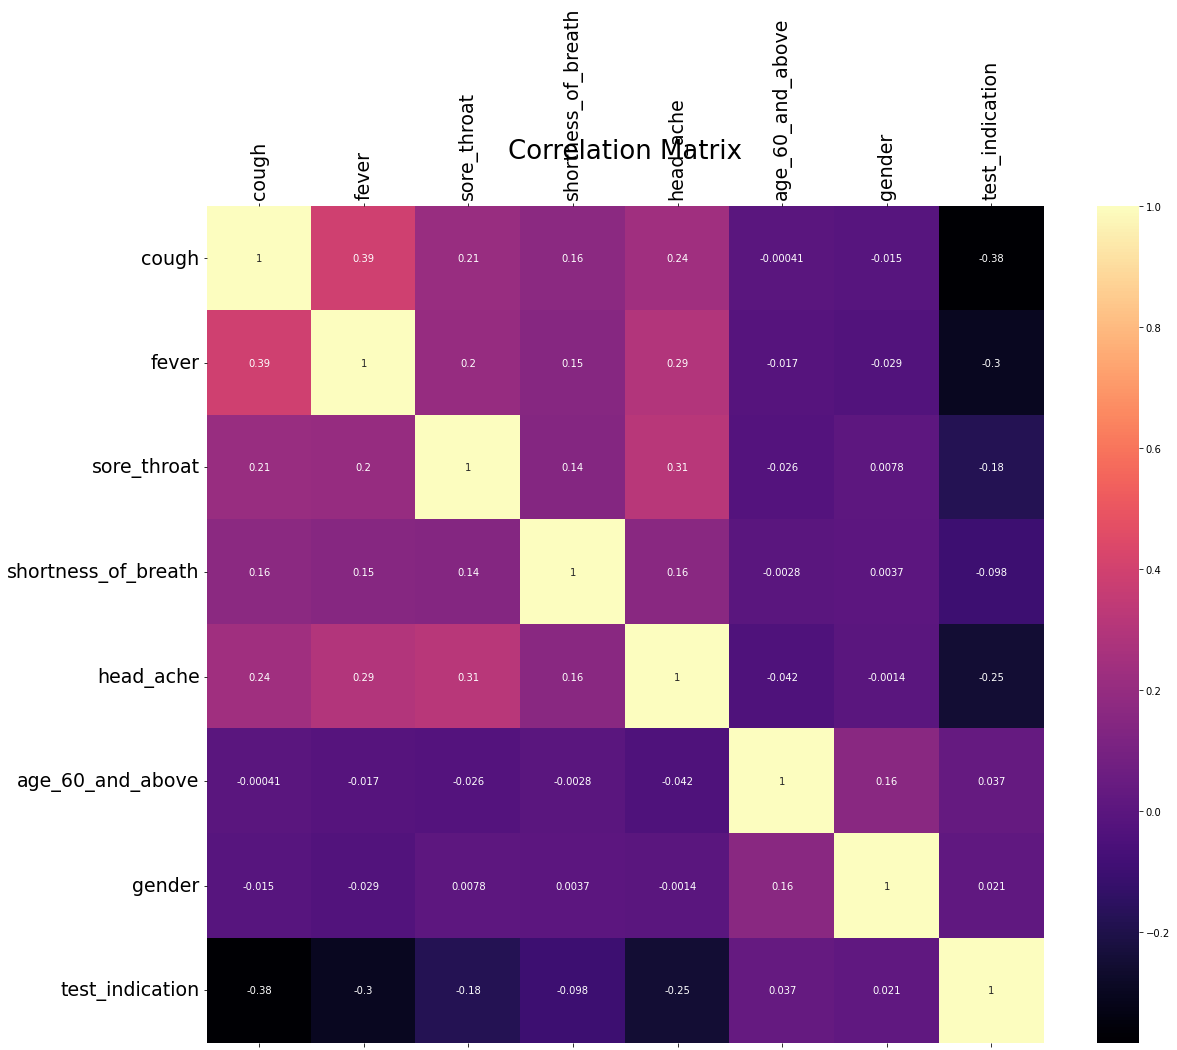

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(),fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=19, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=19)
plt.title('Correlation Matrix', fontsize=26);
dataplot=sns.heatmap(df.corr(),cmap='magma',annot=True)
plt.show()

### describe all data

In [ ]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='magma')

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.347533,0.398948,0.455743,0.072914,-0.233402,-0.731222,0.477978,-0.442621,0.015185
1,0.347533,1.000000,-0.284056,0.571003,-0.285483,0.382480,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1.000000,-0.523649,0.152937,-0.139176,-0.092895,0.016266,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1.000000,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.446650
4,0.072914,-0.285483,0.152937,-0.225343,1.000000,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.382480,-0.139176,-0.227577,-0.104438,1.000000,-0.030252,0.417640,0.205851,0.095084
6,-0.731222,-0.362842,-0.092895,-0.481548,-0.147477,-0.030252,1.000000,-0.494440,0.381407,-0.353652
7,0.477978,0.642578,0.016266,0.473286,-0.523283,0.417640,-0.494440,1.000000,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1.000000,0.150421
9,0.015185,0.190047,-0.383585,0.446650,-0.189916,0.095084,-0.353652,0.417863,0.150421,1.000000


### split data into two part

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=0)

### change the data type

In [ ]:
df.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9    float64
dtype: object

In [ ]:
df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

# algorithm

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(max_iter=300,activation='relu')

### model trainning

In [ ]:
mlp.fit(xtrain,ytrain)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

### model value prediction

In [ ]:
ypred=mlp.predict(xtest)
ypred

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype='<U8')

In [ ]:
print(ytest)

484719     negative
2291802    negative
22704      negative
328613     negative
1629417    negative
             ...   
1990605    negative
1375557    positive
1040380    positive
181381     negative
454086     negative
Name: corona_result, Length: 822779, dtype: object


### create a classification report

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

cm=confusion_matrix(ytest,ypred)
print(accuracy_score(ytest,ypred))

0.9249227313774415


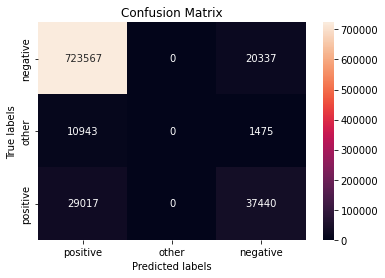

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm,annot=True,fmt='d',ax=ax)

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['positive', 'other','negative']);
ax.yaxis.set_ticklabels(['negative', 'other','positive']);

In [ ]:
print(classification_report(ytest,ypred,zero_division=0))

              precision    recall  f1-score   support

    negative       0.95      0.97      0.96    743904
       other       0.00      0.00      0.00     12418
    positive       0.63      0.56      0.60     66457

    accuracy                           0.92    822779
   macro avg       0.53      0.51      0.52    822779
weighted avg       0.91      0.92      0.92    822779

